In [1]:
!pip uninstall keras --yes

Found existing installation: keras 3.2.1
Uninstalling keras-3.2.1:
  Successfully uninstalled keras-3.2.1


In [2]:
!pip install tensorflow[and-cuda]

  Preparing metadata (setup.py) ... - \ done
INFO: pip is looking at multiple versions of tensorflow[and-cuda] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 8.3 MB/s eta 0:00:00


In [3]:
import tensorflow
print(tensorflow.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove6b300dtxt/glove.6B.300d.txt
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
import re
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
fake=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
fake['fake']=1
fake['real']=0
true['real']=1
true['fake']=0
fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)
News=pd.concat([fake,true],ignore_index=True)
News.info
News_labels = News[["fake", "real"]]


/kaggle/input/glove6b300dtxt/glove.6B.300d.txt
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [6]:
## Word Pre-Processing ##
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")
def normalize_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

X = []
headlines = list(News['text'])
for j in headlines:
    X.append(normalize_text(j))
    

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/c

In [7]:
x = X;
y = News[["fake", "real"]]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20, train_size=0.80, random_state=42)

In [9]:

# First output
y1_train = y_train[["fake"]].values
y1_test =  y_test[["fake"]].values

# Second output
y2_train = y_train[["real"]].values
y2_test =  y_test[["real"]].values

In [10]:

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import Bidirectional,GRU,concatenate,SpatialDropout1D
from tensorflow.keras.layers import GlobalMaxPooling1D,GlobalAveragePooling1D,Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate
import matplotlib.pyplot as plt
from keras import layers
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
######## Textual Features for Embedding ###################
max_len = 200
max_features = 10000
embed_size = 300
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test= tokenizer.texts_to_sequences(x_test)
x_train = pad_sequences(x_train, padding='post', maxlen=max_len)
x_test = pad_sequences(x_test, padding='post', maxlen=max_len)

In [11]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open("/kaggle/input/glove6b300dtxt/glove.6B.300d.txt", encoding="utf8") ## pre-trained or self trained global vectors file ##
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()
vocab_size = len(tokenizer.word_index) + 1  ## total distinct words is the Vocabulary ##
word_index = tokenizer.word_index
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [12]:
sequence_input = Input(shape=(max_len, ))
x = Embedding(vocab_size, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input)
x = SpatialDropout1D(0.2)(x) ## ostly drops the entire 1D feature map rather than individual elements.
x = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(x)
x = Bidirectional(LSTM(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x)
avg_pool = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(avg_pool)
x = Dropout(0.1)(x)
output1 = Dense(1, activation='sigmoid')(x)
output2 = Dense(1, activation='sigmoid')(x)
model = Model(inputs=sequence_input, outputs=[output1, output2])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc','acc'])
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 200, 300)  │ 27,962,100 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, 200, 300)  │          0 │ embedding[0][0]   │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 198, 64)   │     57,664 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 198, 256)  │    197,632 │ conv1d[0][0]      │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ bidirectional[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     32,896 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 28,250,550 (107.77 MB)

 Trainable params: 288,450 (1.10 MB)

 Non-trainable params: 27,962,100 (106.67 MB)

None


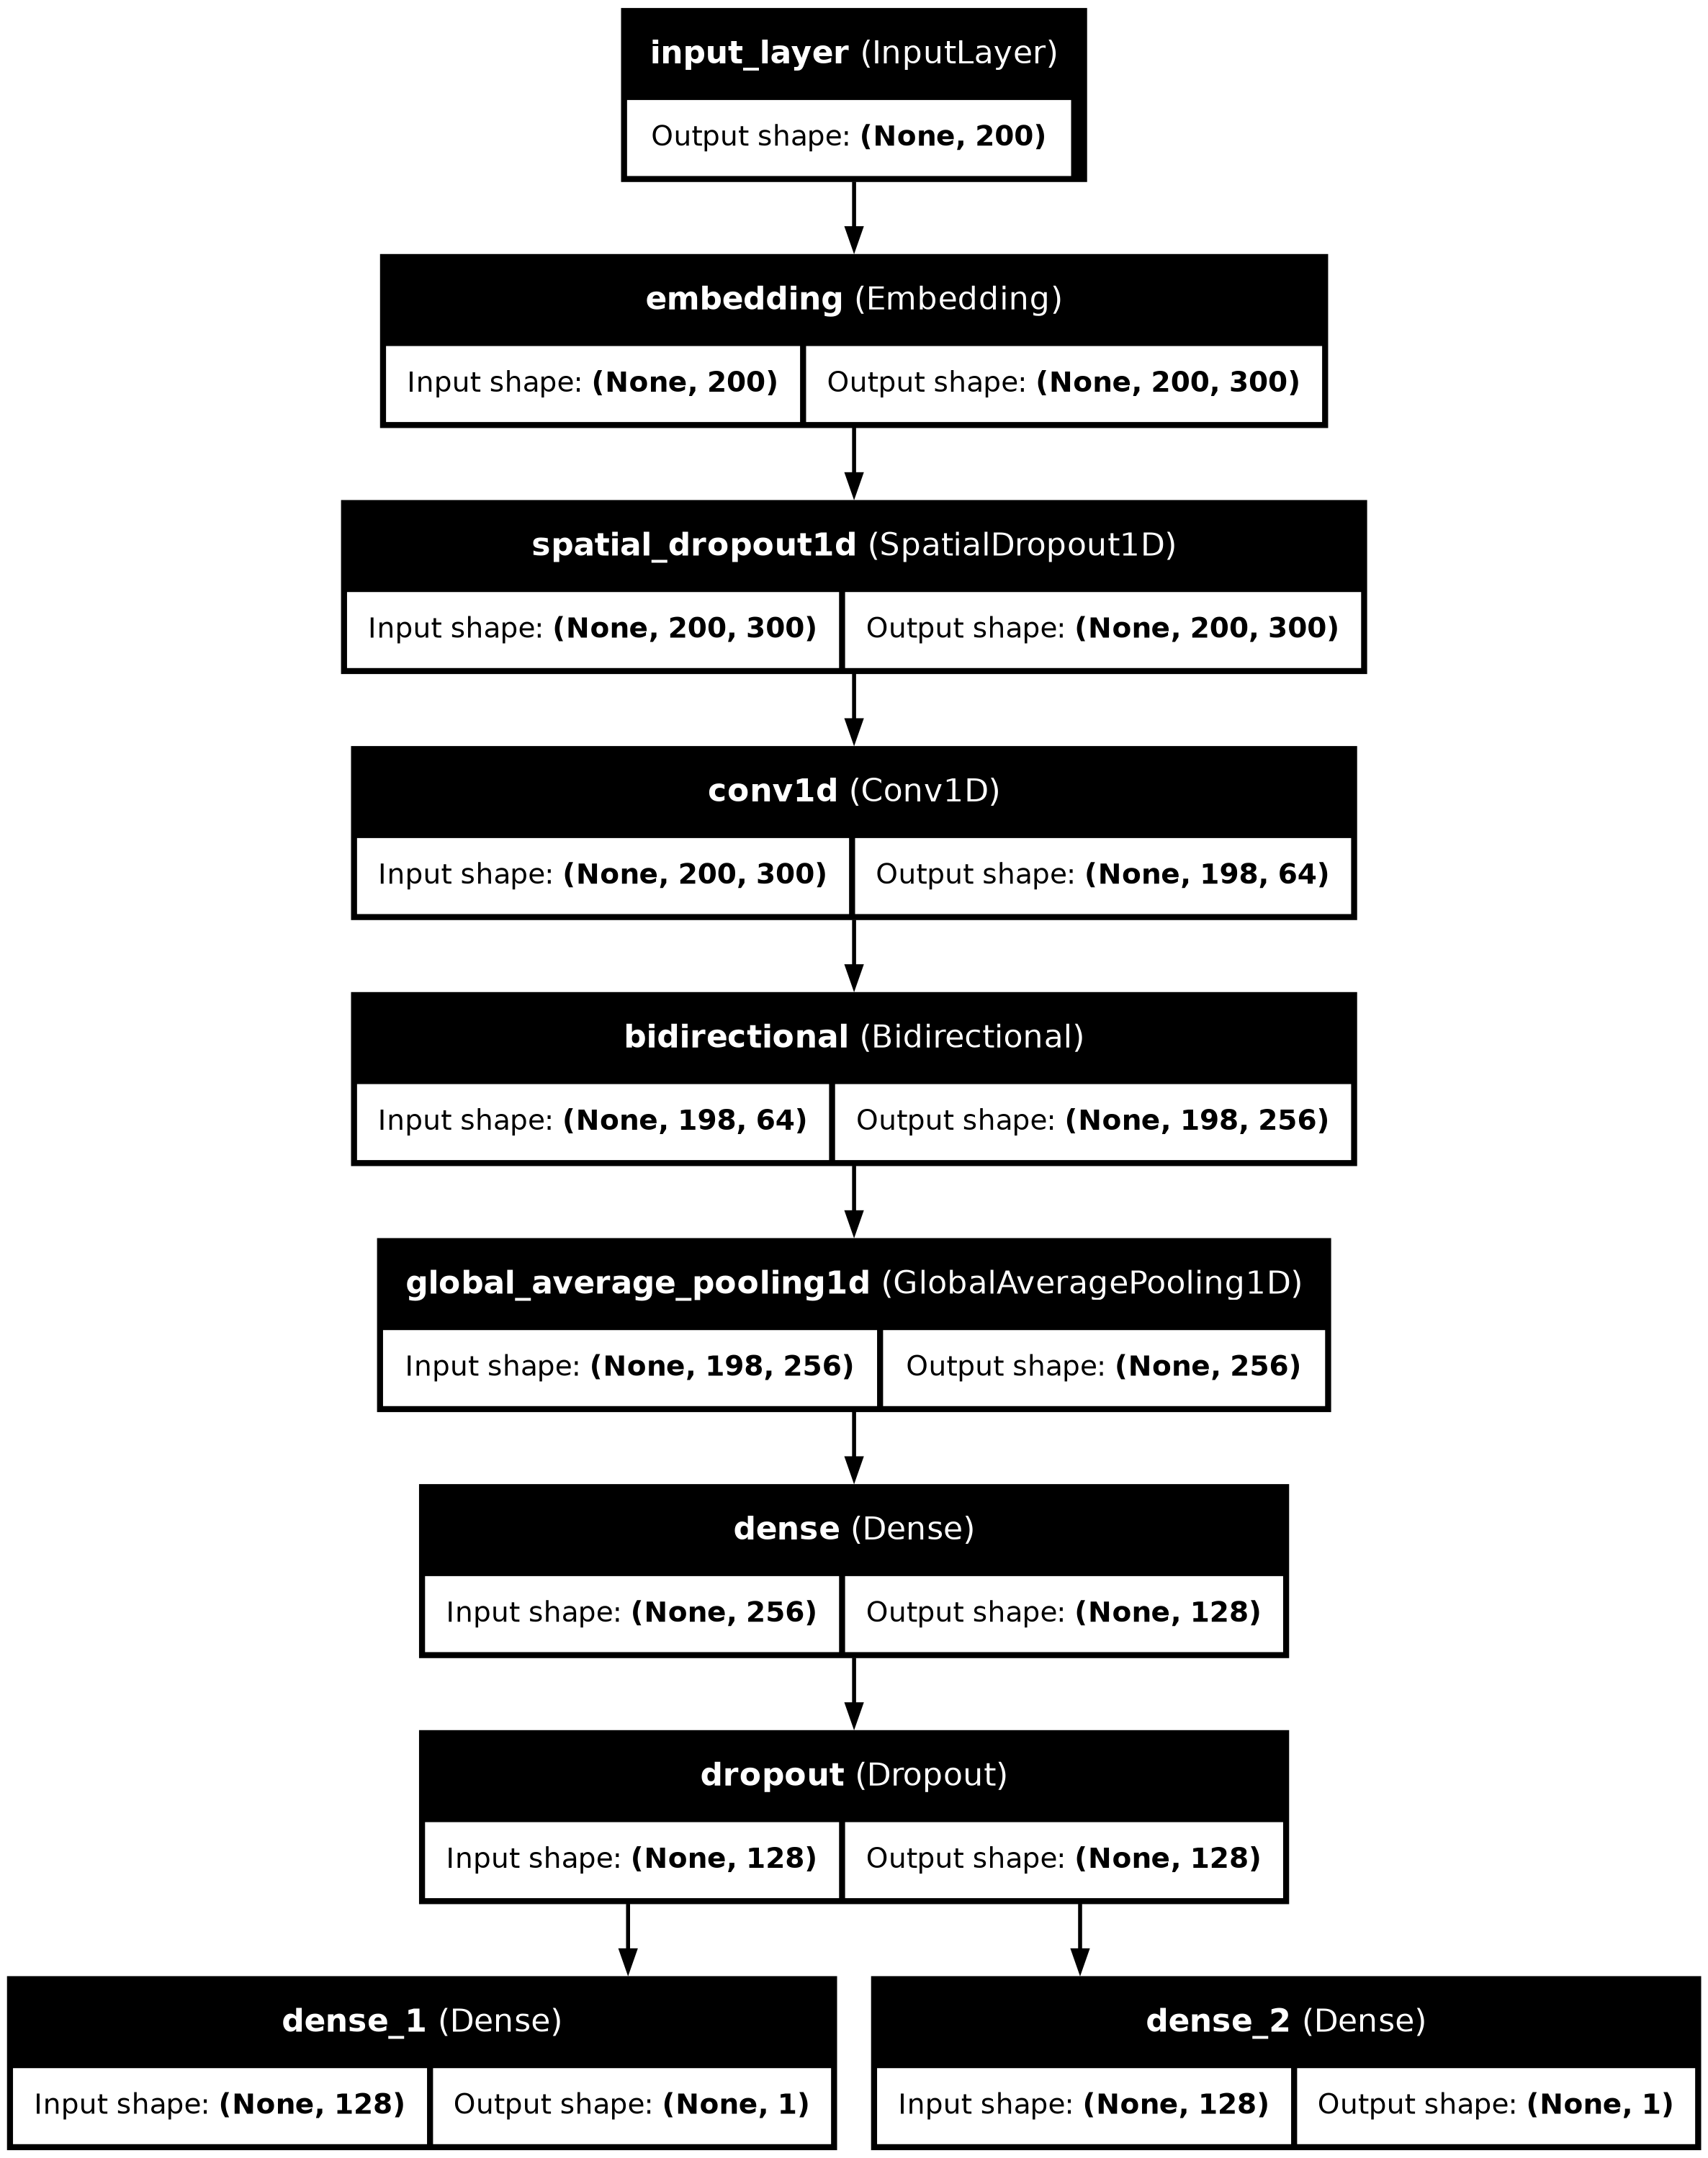

In [13]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4b.png', show_shapes=True, show_layer_names=True)

In [14]:
tensorflow.debugging.set_log_device_placement(True)

history = model.fit(x=x_train, y=[y1_train,y2_train], batch_size=256, epochs=5,
                    verbose=1, validation_split=0.2)
model.save_weights("./DLPProject.weights.h5")

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 474ms/step - dense_1_acc: 0.8531 - dense_2_acc: 0.8420 - loss: 0.7677 - val_dense_1_acc: 0.9073 - val_dense_2_acc: 0.9084 - val_loss: 0.4789
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 77s 469ms/step - dense_1_acc: 0.9298 - dense_2_acc: 0.9290 - loss: 0.3768 - val_dense_1_acc: 0.9665 - val_dense_2_acc: 0.9656 - val_loss: 0.1871
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 53s 469ms/step - dense_1_acc: 0.9624 - dense_2_acc: 0.9624 - loss: 0.2107 - val_dense_1_acc: 0.9756 - val_dense_2_acc: 0.9765 - val_loss: 0.1370
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 52s 462ms/step - dense_1_acc: 0.9703 - dense_2_acc: 0.9702 - loss: 0.1589 - val_dense_1_acc: 0.9784 - val_dense_2_acc: 0.9784 - val_loss: 0.1189
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 463ms/step - dense_1_acc: 0.9715 - dense_2_acc: 0.9717 - loss: 0.1600 - val_dense_1_acc: 0.9726 - val_dense_2_acc: 0.9723 - val_loss: 0.1478


In [15]:
score = model.evaluate(x=x_train, y=[y1_train,y2_train],verbose=1)

1123/1123 ━━━━━━━━━━━━━━━━━━━━ 99s 88ms/step - dense_1_acc: 0.9734 - dense_2_acc: 0.9727 - loss: 0.1490


In [16]:

print(history.params)

# check the keys of history object
print(history.history.keys())



{'verbose': 1, 'epochs': 5, 'steps': 113}
dict_keys(['dense_1_acc', 'dense_2_acc', 'loss', 'val_dense_1_acc', 'val_dense_2_acc', 'val_loss'])


In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['dense_19_acc'])
plt.plot(history.history['val_dense_19_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

KeyError: 'dense_19_acc'